In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import re
import stanza
import codecs

# Given the correlation matrix (cm) returns the couples of variables that have a higher than threshold corr.
def get_high_correlation_indexes(cm, threshold):
    high_indexes = np.where(np.abs(cm) > threshold)
    high_indexes = [(cm.index[x], cm.columns[y]) for x, y in zip(*high_indexes)
                                        if x != y and x < y]
    return high_indexes

def print_high_correlations(cm, threshold = 0.5):
    cm = df.corr()
    hi = get_high_correlation_indexes(cm, threshold)
    for index in hi:
        print(f"{index[0]} x {index[1]}\n")

In [2]:
df = pd.read_csv('words_glasgow.csv')
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,160074.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,4224864.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,140105.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,124123.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,128143.0


# Missing Values

In [3]:
df.isnull().sum()

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
dtype: int64

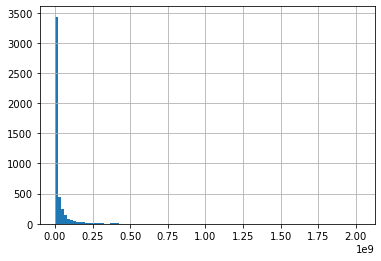

In [4]:
df['web_corpus_freq'].hist(bins=100)
plt.show()

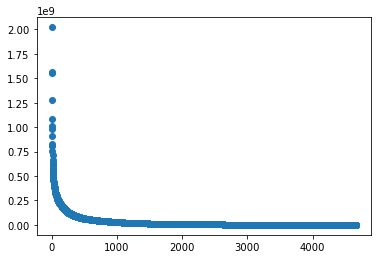

In [5]:
# Zipf's Law 
df['rank'] = df['web_corpus_freq'].rank(ascending=False)
plt.scatter( df['rank'], df['web_corpus_freq'])
plt.show()

In [6]:
df['web_corpus_freq'].describe()

count    4.668000e+03
mean     2.988976e+07
std      8.490144e+07
min      1.277000e+04
25%      1.671100e+06
50%      5.702982e+06
75%      2.232705e+07
max      2.022460e+09
Name: web_corpus_freq, dtype: float64

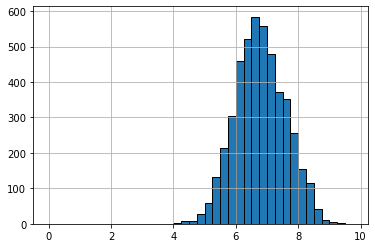

In [7]:
df['log_freq'] = np.log10(df['web_corpus_freq'])
df['log_freq'].hist(bins=np.arange(0,10,0.25), edgecolor='k')
plt.show()

In [8]:
df['log_freq'].describe()

count    4668.000000
mean        6.784210
std         0.801135
min         4.106191
25%         6.223002
50%         6.756102
75%         7.348831
max         9.305880
Name: log_freq, dtype: float64

In [9]:
print_high_correlations(df)

arousal x semsize

valence x dominance

concreteness x imageability

familiarity x aoa

familiarity x rank

familiarity x log_freq

web_corpus_freq x log_freq

rank x log_freq



In [10]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720,0.229789,-0.241556
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100,-0.069194,0.062872
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744,-0.295724,0.293949
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664,-0.219043,0.218352
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652,-0.018922,0.018665
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132,-0.022162,0.019810
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419,-0.575492,0.577538
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596,0.417745,-0.420236
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869,-0.162970,0.158117
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679,0.058159,-0.060504


In [11]:
# Maybe is better since there is a hint of correlation. Still dunno why a word is left out
def fill_mean(x):
    return x.fillna(x.mean())

df['log_freq'] = df['log_freq'].groupby(round(df['familiarity'])).apply(fill_mean)
df.isnull().sum()

word                0
length              0
arousal             0
valence             0
dominance           0
concreteness        0
imageability        0
familiarity         0
aoa                 0
semsize             0
gender              0
polysemy            0
web_corpus_freq    14
rank               14
log_freq            0
dtype: int64

In [12]:
df[df['rank'].isnull()]

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq
585,burgle,6,5.118,2.303,3.656,4.970,5.424,5.200,3.735,4.697,5.333,0,NaN,NaN,6.605607
753,Christmas,9,7.516,7.914,5.600,5.086,6.571,6.710,1.600,6.394,3.771,0,NaN,NaN,7.656227
1070,Dad,3,4.912,6.849,4.618,6.257,6.400,6.853,1.265,5.147,6.706,0,NaN,NaN,7.656227
1076,Dame,4,4.194,5.594,5.469,5.125,4.969,3.697,4.969,4.548,1.242,0,NaN,NaN,6.202763
1540,Facebook,8,4.971,4.857,4.486,5.943,6.229,6.829,6.314,5.114,4.171,0,NaN,NaN,7.656227
1559,FALSE,5,4.636,2.941,4.206,3.455,2.765,5.700,3.086,4.500,4.353,0,NaN,NaN,7.137242
2673,Mom,3,5.667,7.936,4.813,6.424,6.250,6.594,1.333,5.094,1.097,0,NaN,NaN,7.656227
2724,Mum,3,4.594,7.938,4.219,6.091,6.625,6.906,1.219,5.061,1.212,0,NaN,NaN,7.656227
2726,Mummy,5,5.364,7.471,4.879,5.794,6.515,6.182,1.771,4.677,1.455,0,NaN,NaN,7.137242
3773,skijump,7,5.914,5.771,5.486,6.200,6.529,4.758,5.028,5.389,5.000,0,NaN,NaN,6.605607


# Trying stuff out

In [13]:
# Trying out stuff:

polysemy = pd.read_csv('words_polysemy_values.csv')
polysemy.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender
0,address (postal),7,3.546,5.000,5.114,5.581,4.559,6.094,3.059,3.471,4.000
1,address (speak to),7,4.000,5.559,6.182,4.114,4.200,4.857,4.800,4.171,3.824
2,aim (objective),3,4.909,6.382,5.909,3.294,2.909,6.030,4.529,4.500,4.235
3,aim (target),3,5.200,5.600,6.714,4.677,5.286,5.970,3.618,3.686,4.743
4,Apple (brand),5,4.849,5.971,4.600,5.943,6.677,6.529,6.000,5.353,4.647


In [14]:
for index, row in polysemy.iterrows():
    polysemy.loc[index, 'original_word'] = re.sub(r" \(.+\)", "", row['word']).lower()
    polysemy.loc[index, 'meaning'] = re.sub(r".+ \((.+)\)", r"\1", row['word']).lower()
    
df['number_of_meanings'] = 0
for index, row in df.iterrows():
    if row['polysemy'] == 1:
        df.loc[index, 'number_of_meanings'] = len(polysemy[polysemy['original_word'] == row['word']])
df[df['polysemy']==1].head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq,number_of_meanings
62,address,7,3.206,5.382,5.364,5.059,4.343,5.839,3.371,3.912,4.000,1,261872866.0,90.0,8.418091,2
107,aim,3,4.794,6.606,6.829,2.677,2.941,5.909,3.857,4.206,4.265,1,28951240.0,1001.0,7.461667,2
188,apple,5,4.677,6.147,5.485,6.824,6.909,6.719,1.529,2.441,3.424,1,50551171.0,646.0,7.703731,2
211,arm,3,3.735,5.471,5.774,6.727,6.571,6.546,1.457,3.171,4.265,1,23724057.0,1121.0,7.375189,2
216,arms,4,4.364,5.546,5.636,6.647,6.485,6.469,2.206,3.758,4.912,1,27432921.0,1027.0,7.438272,2


In [15]:
print_high_correlations(df)


arousal x semsize

valence x dominance

concreteness x imageability

familiarity x aoa

familiarity x rank

familiarity x log_freq

polysemy x number_of_meanings

web_corpus_freq x log_freq

rank x log_freq



In [16]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq,number_of_meanings
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720,0.229789,-0.241909,-0.229598
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100,-0.069194,0.063725,-0.077488
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744,-0.295724,0.294660,0.021275
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664,-0.219043,0.217345,0.055478
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652,-0.018922,0.019655,0.108277
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132,-0.022162,0.021157,0.100231
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419,-0.575492,0.578574,0.108706
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596,0.417745,-0.420244,-0.180068
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869,-0.162970,0.159322,-0.124924
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679,0.058159,-0.060892,0.023937


In [17]:
polysemy.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,original_word,meaning
0,address (postal),7,3.546,5.000,5.114,5.581,4.559,6.094,3.059,3.471,4.000,address,postal
1,address (speak to),7,4.000,5.559,6.182,4.114,4.200,4.857,4.800,4.171,3.824,address,speak to
2,aim (objective),3,4.909,6.382,5.909,3.294,2.909,6.030,4.529,4.500,4.235,aim,objective
3,aim (target),3,5.200,5.600,6.714,4.677,5.286,5.970,3.618,3.686,4.743,aim,target
4,Apple (brand),5,4.849,5.971,4.600,5.943,6.677,6.529,6.000,5.353,4.647,apple,brand


In [18]:
polysemy['avg_variance'] = 0.0

In [19]:
for index, row in polysemy.iterrows():
    same_word = polysemy[polysemy['original_word'] == row['original_word']]
    polysemy.loc[index, 'avg_variance'] = same_word['valence'].var() + same_word['arousal'].var() + same_word['dominance'].var() + same_word['concreteness'].var() +  same_word['imageability'].var() + same_word['familiarity'].var() + same_word['aoa'].var() + same_word['semsize'].var() + same_word['gender'].var()
    
df['avg_variance_between_meanings'] = 0
for index, row in df.iterrows():
    if row['polysemy'] == 1:
        df.loc[index, 'avg_variance_between_meanings'] = polysemy[polysemy['original_word'] == row['word']]['avg_variance'].min() / 9

In [20]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq,number_of_meanings,avg_variance_between_meanings
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720,0.229789,-0.241909,-0.229598,-0.200327
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100,-0.069194,0.063725,-0.077488,-0.070431
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744,-0.295724,0.294660,0.021275,0.009606
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664,-0.219043,0.217345,0.055478,0.042958
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652,-0.018922,0.019655,0.108277,0.109573
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132,-0.022162,0.021157,0.100231,0.104787
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419,-0.575492,0.578574,0.108706,0.091706
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596,0.417745,-0.420244,-0.180068,-0.163682
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869,-0.162970,0.159322,-0.124924,-0.120811
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679,0.058159,-0.060892,0.023937,0.020838


# NLP analysys

In [21]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,mwt,pos', tokenize_no_ssplit=True)
for index, row in df.iterrows():
    df.loc[index,'PoS'] = nlp(row['word']).sentences[0].words[0].upos

2021-12-21 21:32:56 WARNING: Can not find mwt: default from official model list. Ignoring it.
2021-12-21 21:32:56 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| pos       | combined |

2021-12-21 21:32:56 INFO: Use device: gpu
2021-12-21 21:32:56 INFO: Loading: tokenize
2021-12-21 21:32:59 INFO: Loading: pos
2021-12-21 21:32:59 INFO: Done loading processors!


In [22]:
tab = pd.crosstab(df['PoS'], df['polysemy'])
tab

polysemy,0,1
PoS,,
ADJ,723,26
ADV,35,9
AUX,0,1
DET,3,0
INTJ,3,3
NOUN,2785,275
NUM,3,0
PRON,1,0
PROPN,114,13


In [23]:
tab_norm = tab.div(tab.sum(1).astype(float), axis=0)
tab_norm

polysemy,0,1
PoS,,
ADJ,0.965287,0.034713
ADV,0.795455,0.204545
AUX,0.000000,1.000000
DET,1.000000,0.000000
INTJ,0.500000,0.500000
NOUN,0.910131,0.089869
NUM,1.000000,0.000000
PRON,1.000000,0.000000
PROPN,0.897638,0.102362


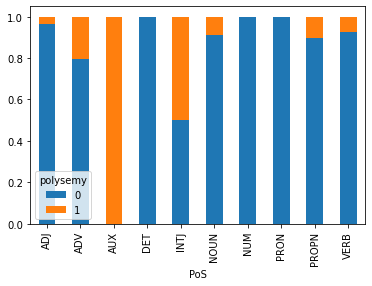

In [24]:
tab_norm.plot(kind='bar', stacked=True)
plt.show()

In [25]:
nlp = stanza.Pipeline(lang='en', processors='tokenize,sentiment', tokenize_no_ssplit=True)
for index, row in df.iterrows():
    df.loc[index,'sentiment'] = nlp(row['word']).sentences[0].sentiment

2021-12-21 21:33:59 INFO: Loading these models for language: en (English):
| Processor | Package  |
------------------------
| tokenize  | combined |
| sentiment | sstplus  |

2021-12-21 21:33:59 INFO: Use device: gpu
2021-12-21 21:33:59 INFO: Loading: tokenize
2021-12-21 21:33:59 INFO: Loading: sentiment
2021-12-21 21:33:59 INFO: Done loading processors!


In [26]:
df.corr()

,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,web_corpus_freq,rank,log_freq,number_of_meanings,avg_variance_between_meanings,sentiment
length,1.000000,0.158401,0.035209,0.005979,-0.199510,-0.204197,-0.118623,0.400869,0.310469,0.003397,-0.231101,-0.157720,0.229789,-0.241909,-0.229598,-0.200327,0.049036
arousal,0.158401,1.000000,0.326418,0.362653,-0.248671,-0.084990,0.180115,-0.005560,0.512953,-0.130571,-0.086200,-0.010100,-0.069194,0.063725,-0.077488,-0.070431,0.279785
valence,0.035209,0.326418,1.000000,0.723138,0.056234,0.092339,0.244815,-0.189220,0.066223,-0.397254,0.020664,0.136744,-0.295724,0.294660,0.021275,0.009606,0.559250
dominance,0.005979,0.362653,0.723138,1.000000,0.036157,0.068979,0.193922,-0.130277,0.085684,-0.077673,0.052000,0.102664,-0.219043,0.217345,0.055478,0.042958,0.441756
concreteness,-0.199510,-0.248671,0.056234,0.036157,1.000000,0.909305,0.094330,-0.381269,-0.406168,0.116861,0.113538,-0.037652,-0.018922,0.019655,0.108277,0.109573,-0.017903
imageability,-0.204197,-0.084990,0.092339,0.068979,0.909305,1.000000,0.214810,-0.494037,-0.328131,0.042241,0.104248,-0.056132,-0.022162,0.021157,0.100231,0.104787,0.009043
familiarity,-0.118623,0.180115,0.244815,0.193922,0.094330,0.214810,1.000000,-0.672021,0.033043,-0.177483,0.105702,0.278419,-0.575492,0.578574,0.108706,0.091706,0.095458
aoa,0.400869,-0.005560,-0.189220,-0.130277,-0.381269,-0.494037,-0.672021,1.000000,0.232247,0.133803,-0.178988,-0.228596,0.417745,-0.420244,-0.180068,-0.163682,-0.047902
semsize,0.310469,0.512953,0.066223,0.085684,-0.406168,-0.328131,0.033043,0.232247,1.000000,0.159873,-0.132842,0.080869,-0.162970,0.159322,-0.124924,-0.120811,0.092344
gender,0.003397,-0.130571,-0.397254,-0.077673,0.116861,0.042241,-0.177483,0.133803,0.159873,1.000000,0.024727,-0.036679,0.058159,-0.060892,0.023937,0.020838,-0.190590


# Outliers

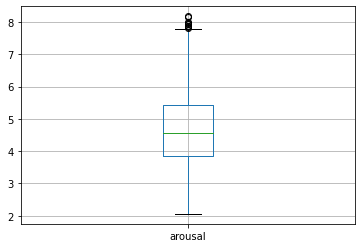

In [27]:
df.boxplot(column=['arousal'])
plt.show()

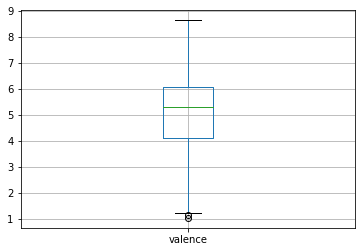

In [28]:
df.boxplot(column=['valence'])
plt.show()

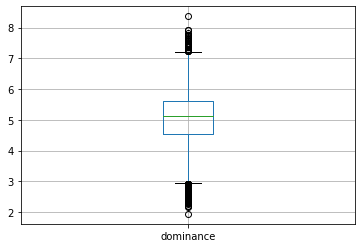

In [29]:
df.boxplot(column=['dominance'])
plt.show()

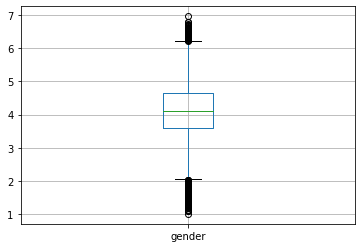

In [30]:
df.boxplot(column=['gender'])
plt.show()

# Output generation

In [31]:
df = df.drop(columns="web_corpus_freq")

In [32]:
df = df.drop(columns="rank")

In [33]:
df.head()

,word,length,arousal,valence,dominance,concreteness,imageability,familiarity,aoa,semsize,gender,polysemy,log_freq,number_of_meanings,avg_variance_between_meanings,PoS,sentiment
0,abattoir,8,4.200,2.864,4.333,5.455,4.391,2.382,6.760,4.652,5.391,0,5.204321,0,0.0,NOUN,1.0
1,abbey,5,3.125,5.781,4.667,5.906,5.344,3.324,5.177,5.121,3.303,0,6.625813,0,0.0,NOUN,1.0
2,abbreviate,10,3.273,5.250,5.235,3.286,3.177,5.121,5.543,2.667,3.971,0,5.146454,0,0.0,VERB,1.0
3,abdicate,8,4.194,3.767,4.419,3.367,2.516,3.971,6.233,4.679,5.167,0,5.093852,0,0.0,VERB,1.0
4,abdication,10,3.846,3.880,4.800,3.292,2.571,3.097,6.407,5.083,4.571,0,5.107695,0,0.0,NOUN,1.0


In [35]:
with codecs.open("data_understanding_output.csv", "w", "utf-8") as file:
    file.write(df.to_csv())